In [4]:
%pip install pandas seaborn matplotlib datasets


import pandas as pd
import seaborn as sns
from datasets import load_dataset  
import matplotlib.pyplot as plt
 
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

Note: you may need to restart the kernel to use updated packages.


c:\Users\USER\anaconda3\envs\first-project\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


KeyboardInterrupt: 

In [6]:
df_DA = df[df['job_country'] == 'United States']
# Split job_skills column into a list if it's not already a list
df_DA.loc[:, 'job_skills'] = df_DA['job_skills'].apply(lambda x: x.split(',') if isinstance(x, str) else x)


# Now explode the column
df_skills = df_DA.explode('job_skills')
df_skills["job_skills"] = df_skills["job_skills"].str.replace(r"[\[\]]", "", regex=True)
df_skills.head()


,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,'python',"{'cloud': ['aws'], 'libraries': ['tensorflow',..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,'c++',"{'cloud': ['aws'], 'libraries': ['tensorflow',..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,'java',"{'cloud': ['aws'], 'libraries': ['tensorflow',..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,'matlab',"{'cloud': ['aws'], 'libraries': ['tensorflow',..."


In [7]:
df_skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size().reset_index(name='skills_count')
df_skills_count.sort_values(by='skills_count', ascending=False, inplace=True)
df_skills_count


,job_skills,job_title_short,skills_count
2648,'sql',Data Analyst,27101
2457,'python',Data Scientist,23019
444,'excel',Data Analyst,22109
1222,'r',Data Scientist,19569
1188,'python',Data Scientist,19360
...,...,...,...
2401,'php',Senior Data Engineer,1
2381,'perl',Business Analyst,1
406,'drupal',Senior Data Scientist,1
1413,'slack',Cloud Engineer,1


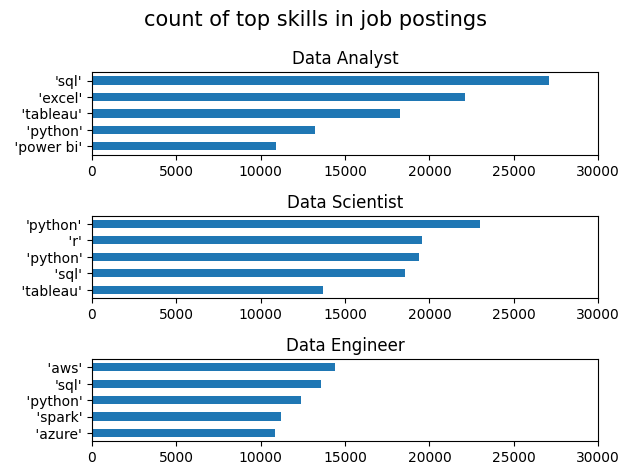

In [8]:
fig, ax = plt.subplots(3, 1)

job_title = ['Data Analyst', 'Data Scientist', 'Data Engineer']

for i, job in  enumerate(job_title):     
  df_plot = df_skills_count[df_skills_count['job_title_short'] == job].head(5)

  df_plot.plot(kind='barh', x='job_skills', y='skills_count', ax=ax[i], title=job)
  ax[i].invert_yaxis()
  ax[i].set_ylabel('')
  ax[i].legend().set_visible(False)
  ax[i].set_xlim(0, 30000)


fig.suptitle('count of top skills in job postings', fontsize=15)
fig.tight_layout()


In [9]:

df_job_title_count = df_DA['job_title_short'].value_counts().reset_index(name='jobs_total')
df_skills_perc = pd.merge(df_skills_count, df_job_title_count, how='left', on='job_title_short')
df_skills_perc['skills_percentage'] = 100* (df_skills_perc['skills_count']/ df_skills_perc['jobs_total'])
df_skills_perc



,job_skills,job_title_short,skills_count,jobs_total,skills_percentage
0,'sql',Data Analyst,27101,67816,39.962546
1,'python',Data Scientist,23019,58830,39.127996
2,'excel',Data Analyst,22109,67816,32.601451
3,'r',Data Scientist,19569,58830,33.263641
4,'python',Data Scientist,19360,58830,32.908380
...,...,...,...,...,...
2808,'php',Senior Data Engineer,1,9289,0.010765
2809,'perl',Business Analyst,1,7382,0.013546
2810,'drupal',Senior Data Scientist,1,12946,0.007724
2811,'slack',Cloud Engineer,1,423,0.236407


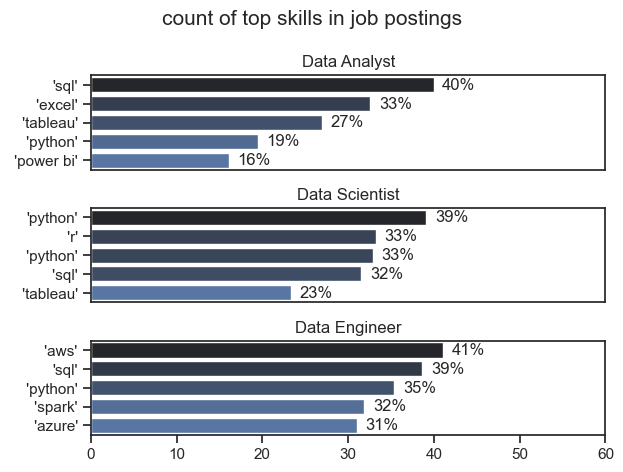

In [11]:
fig, ax = plt.subplots(3, 1)

job_title = ['Data Analyst', 'Data Scientist', 'Data Engineer']
sns.set_theme(style='ticks')

for i, job in  enumerate(job_title):     
  df_plot = df_skills_perc[df_skills_perc['job_title_short'] == job].head(5)
  sns.barplot(data=df_plot, x='skills_percentage', y='job_skills',  ax=ax[i], hue='skills_percentage', palette='dark:b_r')
  ax[i].set_title(job)
  ax[i].set_ylabel('')
  ax[i].set_xlabel('')
  ax[i].legend().set_visible(False)
  ax[i].set_xlim(0, 60)
  for n, v in enumerate(df_plot['skills_percentage']):
    ax[i].text(v +1, n, f'{v:.0f}%', va='center')
  if i != len(job_title) -1:
    ax[i].set_xticks([])



 


fig.suptitle('count of top skills in job postings', fontsize=15)
fig.tight_layout()
